<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/Classification-Projects/blob/main/04-Breast_Cancer_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Dataset 

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Breast_cancer_data.csv')
print(data.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


### Data Exploration

In [ ]:
print('’Breast Cancer DataSet ’')
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))
print('Columns names : ', list(data.columns))
print(data.head(5))
print(data.info())
print(data.describe())

’Breast Cancer DataSet ’
Number of Rows: 569
Number of Columns: 6
Columns names :  ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-nul

### Data Visualization

Number of Malignant cancer =  357
Number of Benign cancer =  212


C:\Users\EL_NASHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


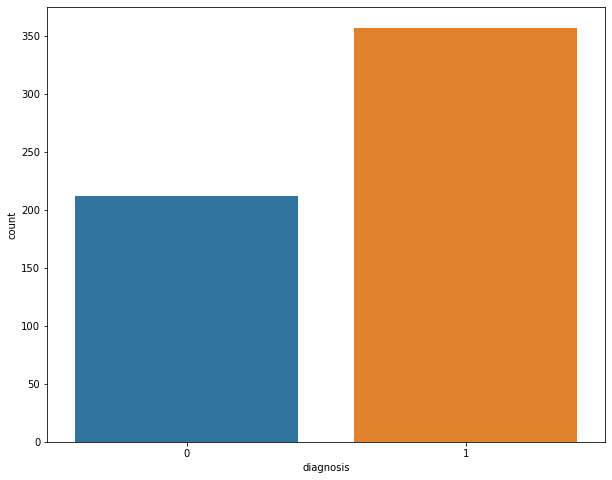

In [ ]:
malignant = data['diagnosis'][data['diagnosis'] == 1].count()
print("Number of Malignant cancer = ", malignant)
benign = data['diagnosis'][data['diagnosis'] == 0].count()
print("Number of Benign cancer = ", benign)
fig = plt.figure(figsize=(10, 8))
sns.countplot(data['diagnosis'])
plt.show()

### Check Multicolinearity


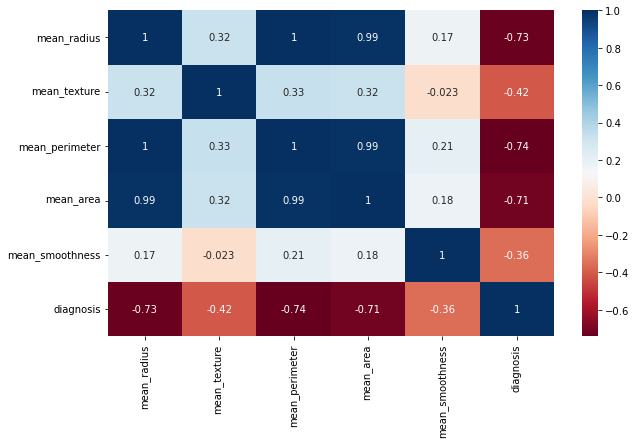

In [ ]:
# heat map to check multicollinearity
fig = plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='RdBu')
plt.show()

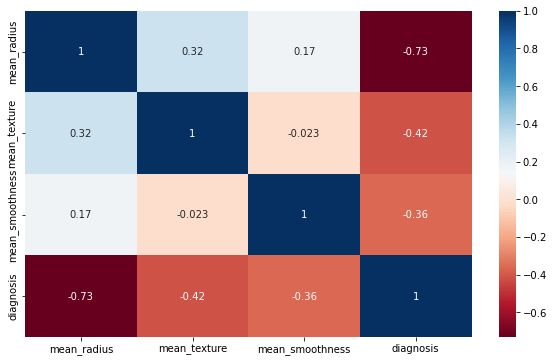

In [ ]:
# Drop mean_area and mean_perimeter
data.drop(['mean_area', 'mean_perimeter'], axis=1, inplace=True)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='RdBu')
plt.show()

Correlation
diagnosis          1.000000
mean_smoothness   -0.358560
mean_texture      -0.415185
mean_radius       -0.730029
Name: diagnosis, dtype: float64


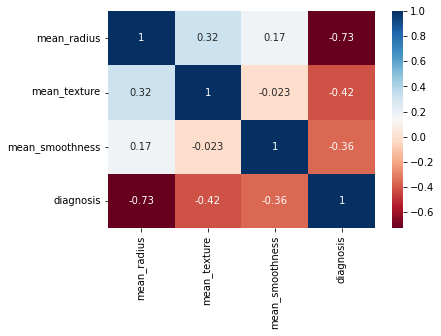

In [ ]:
# Check correlation
print('Correlation')
print(data.corr()['diagnosis'].sort_values(ascending=False))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

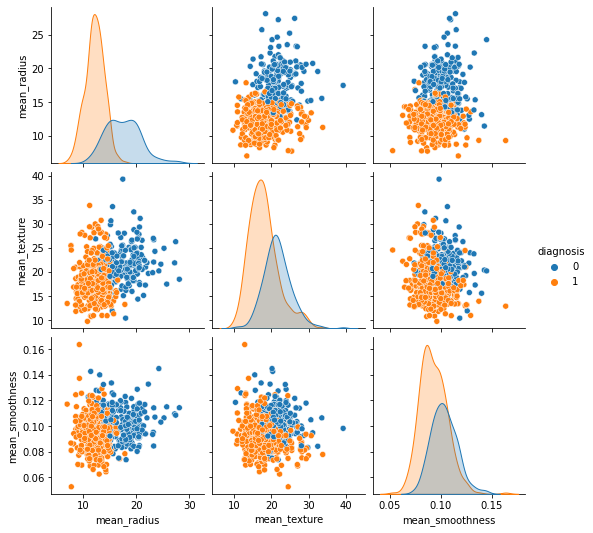

In [ ]:
# scatter data
sns.pairplot(data=data, hue="diagnosis")
plt.show()

In [ ]:
x = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

###  StandardScaler

In [ ]:
# StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
# Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy rdf kernel and C=1.0: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')

# SVM with c=100.0
svm = SVC(kernel='rbf', C=100.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy rdf kernel and C=100: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')


Accuracy rdf kernel and C=1.0: 0.8889
Precision: 0.908256880733945
Recall: 0.9166666666666666
F1 Score 0.912442396313364
--------------------------------------------------------------
Accuracy rdf kernel and C=100: 0.8713
Precision: 0.9056603773584906
Recall: 0.8888888888888888
F1 Score 0.897196261682243
--------------------------------------------------------------


In [ ]:
# SVM with c=1000.0
svm = SVC(kernel='rbf', C=1000.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy rdf kernel and C=1000: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))

Accuracy rdf kernel and C=1000: 0.8538
Precision: 0.8807339449541285
Recall: 0.8888888888888888
F1 Score 0.8847926267281107


In [ ]:
# SVM with linear kernel and C=1.0
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy linear kernel and C=1.0: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')

Accuracy linear kernel and C=1.0: 0.9181
Precision: 0.9351851851851852
Recall: 0.9351851851851852
F1 Score 0.9351851851851852
--------------------------------------------------------------


In [ ]:
# SVM with linear kernel and C=100.0
svm = SVC(kernel='linear', C=100.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy linear kernel and C=100: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))

Accuracy linear kernel and C=100: 0.9240
Precision: 0.9357798165137615
Recall: 0.9444444444444444
F1 Score 0.9400921658986177


In [ ]:
# SVM with linear kernel and C=1000.0
svm = SVC(kernel='linear', C=1000)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy linear kernel and C=1000: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')


Accuracy linear kernel and C=1000: 0.9240
Precision: 0.9357798165137615
Recall: 0.9444444444444444
F1 Score 0.9400921658986177
--------------------------------------------------------------


In [ ]:
# SVM with poly kernel and C=1.0
svm = SVC(kernel='poly', C=1.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy poly kernel and C=1.0: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')


Accuracy poly kernel and C=1.0: 0.8713
Precision: 0.8583333333333333
Recall: 0.9537037037037037
F1 Score 0.9035087719298245
--------------------------------------------------------------


In [ ]:
# SVM with poly kernel and C=100.0
svm = SVC(kernel='poly', C=100.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy poly kernel and C=100: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')


Accuracy poly kernel and C=100: 0.8889
Precision: 0.8869565217391304
Recall: 0.9444444444444444
F1 Score 0.914798206278027
--------------------------------------------------------------


In [ ]:
# SVM with poly kernel and C=1000.0
svm = SVC(kernel='poly', C=1000)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy poly kernel and C=1000: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')

'''which is important in this problem precision or recall ? =  Recall
because in this problem FN is the important value'''

Accuracy poly kernel and C=1000: 0.8889
Precision: 0.8938053097345132
Recall: 0.9351851851851852
F1 Score 0.9140271493212669
--------------------------------------------------------------


'which is important in this problem precision or recall ? =  Recall\nbecause in this problem FN is the important value'

In [ ]:
# SVM with poly kernel and C=100.0
svm = SVC(kernel='poly', C=100.0)
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print('Accuracy poly kernel and C=100: {0:0.4f}'.
      format(accuracy_score(y_test, y_predict)))
print("Precision:", metrics.precision_score(y_test, y_predict))
print("Recall:", metrics.recall_score(y_test, y_predict))
print("F1 Score", metrics.f1_score(y_test, y_predict))
print('--------------------------------------------------------------')

Accuracy poly kernel and C=100: 0.8889
Precision: 0.8869565217391304
Recall: 0.9444444444444444
F1 Score 0.914798206278027
--------------------------------------------------------------


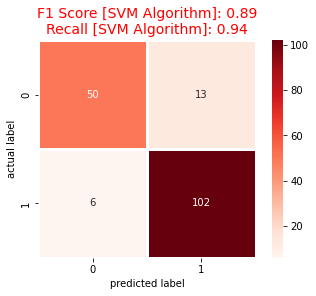

In [ ]:
# confusion matrix and f1 score
f1_score_SVM = metrics.f1_score(y_test, y_predict, average='micro')
cm_knn = metrics.confusion_matrix(y_test, y_predict)
recall_SVM = metrics.recall_score(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score [SVM Algorithm]: {f1_score_SVM:.2f}\n'
          f'Recall [SVM Algorithm]: {recall_SVM:.2f}', size=14, color='red')
plt.show()


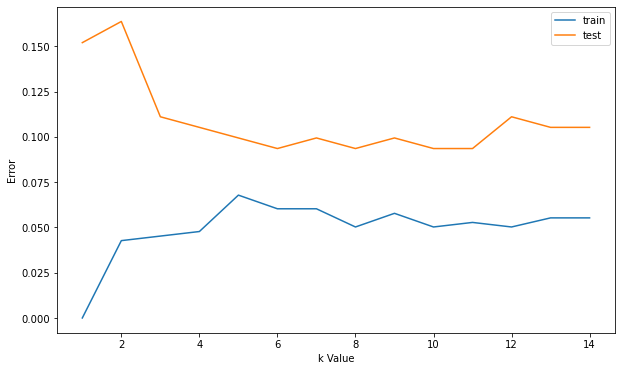

In [ ]:
# KNN Algorithm
# Find the Best value for K
error1 = []
error2 = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predicted1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_predicted1))
    y_predicted2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_predicted2))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error1, label="train")
plt.plot(range(1, 15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()
# The best key value = 6


[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
[1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
[[56  7]
 [ 9 99]]
90.64327485380117
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.93      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90      

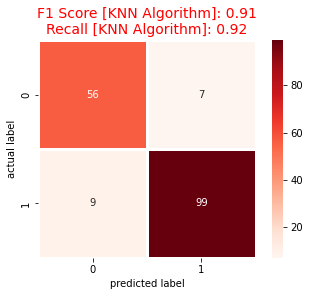

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print(y_test)
print(y_predicted)
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.accuracy_score(y_test, y_predicted)*100)
print(metrics.classification_report(y_test, y_predicted))
# confusion matrix and f1 score
f1_score_knn = metrics.f1_score(y_test, y_predicted, average='micro')
cm_knn = metrics.confusion_matrix(y_test, y_predicted)
recall_KNN = metrics.recall_score(y_test, y_predicted)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score [KNN Algorithm]: {f1_score_knn:.2f}\n'
          f'Recall [KNN Algorithm]: {recall_KNN:.2f}', size=14, color='red')
plt.show()



[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
[1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]


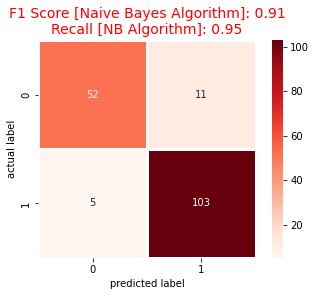

In [ ]:
# Naive Bayes Algorithm
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_predicted = gnb.predict(X_test)
print(y_test)
print(y_predicted)
# confusion matrix and f1 score
f1_score_NB = metrics.f1_score(y_test, y_predicted, average='micro')
cm_mnb = metrics.confusion_matrix(y_test, y_predicted)
recall_NB = metrics.recall_score(y_test, y_predicted)
sns.heatmap(cm_mnb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score [Naive Bayes Algorithm]: {f1_score_NB:.2f}\n'
          f'Recall [NB Algorithm]: {recall_NB:.2f}', size=14, color='red')
plt.show()


Accuracy of Logistic Regression Algorithm:  92.98245614035088
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



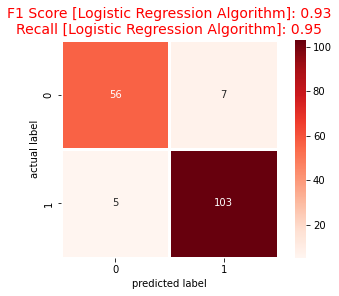

In [ ]:
# Logistic Regression
log = LogisticRegression()
model = log.fit(X_train, y_train)
y_predicted = log.predict(X_test)
# confusion matrix and f1 score
print('Accuracy of Logistic Regression Algorithm: '
      , metrics.accuracy_score(y_test, y_predicted)*100)
print(metrics.classification_report(y_test, y_predicted))

f1_score_log = metrics.f1_score(y_test, y_predicted, average='micro')
cm_log = metrics.confusion_matrix(y_test, y_predicted)
recall_log = metrics.recall_score(y_test, y_predicted)
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score [Logistic Regression Algorithm]: {f1_score_log:.2f}\n'
          f'Recall [Logistic Regression Algorithm]: {recall_log:.2f}', size=14, color='red')
plt.show()


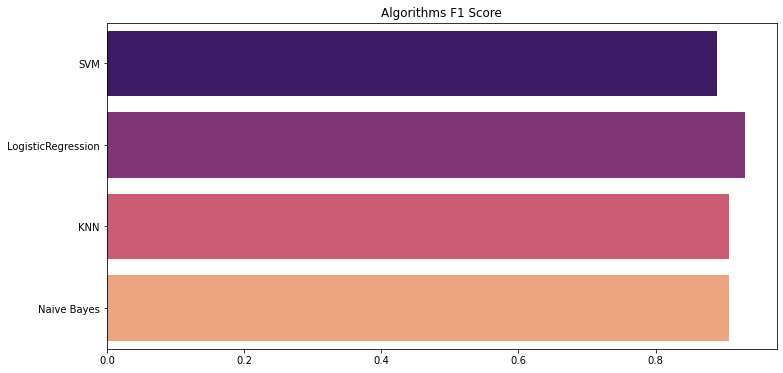

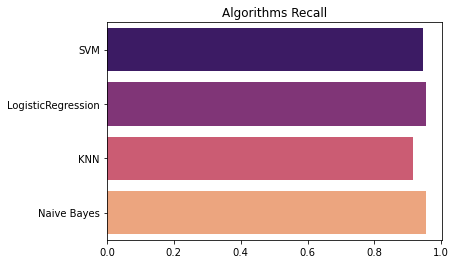

In [ ]:
# comparison between Algorithms
plt.figure(figsize=(12, 6))
model_acc = [f1_score_SVM, f1_score_log, f1_score_knn, f1_score_NB]
recalls = [recall_SVM, recall_log, recall_KNN, recall_NB]
model_name = ['SVM', 'LogisticRegression', 'KNN', 'Naive Bayes']
recall_name = ['SVM', 'LogisticRegression', 'KNN', 'Naive Bayes']
sns.barplot(x=model_acc, y=model_name, palette='magma')
plt.title('Algorithms F1 Score')
plt.show()
sns.barplot(x=recalls, y=recall_name, palette='magma')
plt.title('Algorithms Recall')
plt.show()